In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/egypt-cars/Cairo-Car-v3-5/README.dataset.txt
/kaggle/input/egypt-cars/Cairo-Car-v3-5/README.roboflow.txt
/kaggle/input/egypt-cars/Cairo-Car-v3-5/data.yaml
/kaggle/input/egypt-cars/Cairo-Car-v3-5/valid/labels/cairo_frame1650_jpg.rf.70187db14538d624861f6405982904c3.txt
/kaggle/input/egypt-cars/Cairo-Car-v3-5/valid/labels/cairo_frame17220_jpg.rf.7b852adc097207cd338ec68729145551.txt
/kaggle/input/egypt-cars/Cairo-Car-v3-5/valid/labels/cairo_frame16590_jpg.rf.8e411a30eb7282405cad0de4faf0139b.txt
/kaggle/input/egypt-cars/Cairo-Car-v3-5/valid/labels/cairo_frame840_jpg.rf.e50e7d9f7cab5424a9c09633f2c3784a.txt
/kaggle/input/egypt-cars/Cairo-Car-v3-5/valid/labels/cairo_frame5100_jpg.rf.4bf04fe925d1de350c8e05c7e669cbda.txt
/kaggle/input/egypt-cars/Cairo-Car-v3-5/valid/labels/cairo_frame2730_jpg.rf.f6045adae153b0ea8778642cf0b4309e.txt
/kaggle/input/egypt-cars/Cairo-Car-v3-5/valid/labels/cairo_frame12090_jpg.rf.2aa7b6de32b59f42ce40c96136eed251.txt
/kaggle/input/egypt-cars/Cairo-Car-v3-

In [5]:
%%capture
!pip install ultralytics
!pip install -U albumentations

In [6]:
from ultralytics import YOLO
model = YOLO('yolov8n.pt')

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 83.2MB/s]


In [7]:
import warnings 
warnings.filterwarnings('ignore')

In [8]:
!cp /kaggle/input/egypt-cars/Cairo-Car-v3-5/data.yaml /kaggle/working/data.yaml


In [9]:
yaml_content = """
names:
  - car
  - motorbike
  - person
nc: 3
roboflow:
  license: CC BY 4.0
  project: cairo-car-v3
  url: https://universe.roboflow.com/ahmed-haytham/cairo-car-v3/dataset/5
  version: 5
  workspace: ahmed-haytham
train: /kaggle/input/egypt-cars/Cairo-Car-v3-5/train/images
val: /kaggle/input/egypt-cars/Cairo-Car-v3-5/valid/images
test: /kaggle/input/egypt-cars/Cairo-Car-v3-5/test/images
"""

with open('/kaggle/working/data.yaml', 'w') as f:
    f.write(yaml_content)


In [10]:
model.train(data='/kaggle/working/data.yaml', epochs=20, imgsz=640)


Ultralytics 8.3.141 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/working/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrained=True, 

100%|██████████| 755k/755k [00:00<00:00, 17.4MB/s]


Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

train: Scanning /kaggle/input/egypt-cars/Cairo-Car-v3-5/train/labels... 416 images, 46 backgrounds, 0 corrupt: 100%|██████████| 416/416 [00:01<00:00, 281.87it/s]

WARNING ⚠️ train: Cache directory /kaggle/input/egypt-cars/Cairo-Car-v3-5/train is not writeable, cache not saved.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.3±0.3 ms, read: 11.2±3.3 MB/s, size: 62.0 KB)


val: Scanning /kaggle/input/egypt-cars/Cairo-Car-v3-5/valid/labels... 157 images, 13 backgrounds, 0 corrupt: 100%|██████████| 157/157 [00:00<00:00, 307.21it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/egypt-cars/Cairo-Car-v3-5/valid is not writeable, cache not saved.
Plotting labels to runs/detect/train/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20         0G      1.053      1.294      1.115         91        640: 100%|██████████| 26/26 [03:10<00:00,  7.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:26<00:00,  5.25s/it]

                   all        157        698      0.887      0.211      0.349      0.237



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20         0G      1.067      1.271      1.121         98        640: 100%|██████████| 26/26 [03:15<00:00,  7.54s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.89s/it]

                   all        157        698      0.865      0.326      0.559      0.351



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20         0G      1.098      1.263      1.164         83        640: 100%|██████████| 26/26 [03:09<00:00,  7.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.95s/it]

                   all        157        698      0.664      0.498      0.594      0.394



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20         0G      1.059       1.17      1.135         76        640: 100%|██████████| 26/26 [03:10<00:00,  7.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.81s/it]

                   all        157        698      0.631      0.478      0.551      0.352



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20         0G      1.043       1.09       1.13         84        640: 100%|██████████| 26/26 [03:15<00:00,  7.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:31<00:00,  6.22s/it]

                   all        157        698      0.629      0.604      0.613      0.405



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20         0G       1.05      1.068      1.122        139        640: 100%|██████████| 26/26 [03:05<00:00,  7.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:27<00:00,  5.43s/it]

                   all        157        698      0.749      0.634      0.721      0.463



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20         0G      1.029      1.034      1.131        106        640: 100%|██████████| 26/26 [03:05<00:00,  7.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:28<00:00,  5.77s/it]

                   all        157        698      0.736      0.754      0.789      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20         0G     0.9619     0.9608      1.087         97        640: 100%|██████████| 26/26 [03:12<00:00,  7.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:27<00:00,  5.58s/it]

                   all        157        698      0.729      0.695       0.76      0.501



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20         0G      0.974     0.9259      1.098         84        640: 100%|██████████| 26/26 [03:06<00:00,  7.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:29<00:00,  5.84s/it]

                   all        157        698       0.81      0.763      0.844      0.565


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20         0G     0.9777      0.982      1.087         82        640: 100%|██████████| 26/26 [03:02<00:00,  7.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:27<00:00,  5.49s/it]

                   all        157        698      0.701      0.788      0.769      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20         0G     0.9307     0.9161      1.082         76        640: 100%|██████████| 26/26 [03:08<00:00,  7.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:26<00:00,  5.21s/it]

                   all        157        698      0.876      0.692      0.796      0.528



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20         0G     0.9108     0.8874      1.068         42        640: 100%|██████████| 26/26 [03:03<00:00,  7.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:27<00:00,  5.56s/it]

                   all        157        698      0.785      0.784      0.844      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20         0G     0.9102     0.8582      1.069         63        640: 100%|██████████| 26/26 [03:04<00:00,  7.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:27<00:00,  5.41s/it]

                   all        157        698      0.906       0.72      0.861      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20         0G      0.889      0.822      1.047         51        640: 100%|██████████| 26/26 [03:02<00:00,  7.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:30<00:00,  6.13s/it]

                   all        157        698      0.881      0.721      0.835      0.566



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20         0G     0.8803     0.8025       1.05         59        640: 100%|██████████| 26/26 [03:07<00:00,  7.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:28<00:00,  5.66s/it]

                   all        157        698      0.799      0.793      0.849      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20         0G     0.8535     0.7768      1.052         59        640: 100%|██████████| 26/26 [03:08<00:00,  7.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:31<00:00,  6.24s/it]

                   all        157        698      0.894      0.738      0.875      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20         0G     0.8138     0.7467       1.03         89        640: 100%|██████████| 26/26 [03:06<00:00,  7.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:28<00:00,  5.61s/it]

                   all        157        698      0.814      0.855      0.865      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20         0G     0.8098     0.7081      1.021         67        640: 100%|██████████| 26/26 [03:06<00:00,  7.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:27<00:00,  5.41s/it]

                   all        157        698      0.832      0.865       0.88      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20         0G     0.8017     0.7055      1.021         58        640: 100%|██████████| 26/26 [03:07<00:00,  7.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:28<00:00,  5.67s/it]

                   all        157        698      0.843      0.848      0.879      0.622



20 epochs completed in 1.208 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.141 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:25<00:00,  5.03s/it]


                   all        157        698      0.832      0.863       0.88      0.623
                   car        140        444       0.91      0.908      0.958      0.783
             motorbike         13         15      0.752      0.867      0.804       0.52
                person         86        239      0.833      0.815      0.878      0.566
Speed: 2.3ms preprocess, 139.2ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b2401624210>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [11]:
model.val()

Ultralytics 8.3.141 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.1±0.3 ms, read: 104.8±28.4 MB/s, size: 63.8 KB)


val: Scanning /kaggle/input/egypt-cars/Cairo-Car-v3-5/valid/labels... 157 images, 13 backgrounds, 0 corrupt: 100%|██████████| 157/157 [00:00<00:00, 672.51it/s]

WARNING ⚠️ val: Cache directory /kaggle/input/egypt-cars/Cairo-Car-v3-5/valid is not writeable, cache not saved.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 10/10 [00:22<00:00,  2.30s/it]


                   all        157        698      0.832      0.863       0.88      0.623
                   car        140        444       0.91      0.908      0.958      0.783
             motorbike         13         15      0.752      0.867      0.804       0.52
                person         86        239      0.833      0.815      0.878      0.566
Speed: 1.1ms preprocess, 128.5ms inference, 0.0ms loss, 2.4ms postprocess per image
Results saved to runs/detect/train2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b23ff791b90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [12]:
results = model.predict(source='/kaggle/input/egypt-cars/Cairo-Car-v3-5/test/images', conf=0.25, save=True)



image 1/25 /kaggle/input/egypt-cars/Cairo-Car-v3-5/test/images/cairo_frame10170_jpg.rf.9acc23ae8a27f98d08c404b30a174dc7.jpg: 640x640 2 cars, 180.6ms
image 2/25 /kaggle/input/egypt-cars/Cairo-Car-v3-5/test/images/cairo_frame1020_jpg.rf.06121049de3b282e4a19359a8a3e0701.jpg: 640x640 3 cars, 1 motorbike, 9 persons, 153.8ms
image 3/25 /kaggle/input/egypt-cars/Cairo-Car-v3-5/test/images/cairo_frame10710_jpg.rf.3e46ba77edc95eb031f99b6f4527c424.jpg: 640x640 (no detections), 149.3ms
image 4/25 /kaggle/input/egypt-cars/Cairo-Car-v3-5/test/images/cairo_frame12720_jpg.rf.b01ed7056447797b0d8ba9a2b72c11bc.jpg: 640x640 4 cars, 146.3ms
image 5/25 /kaggle/input/egypt-cars/Cairo-Car-v3-5/test/images/cairo_frame1380_jpg.rf.2096de041dbf6427ae79118e199d9ae2.jpg: 640x640 1 car, 4 persons, 152.0ms
image 6/25 /kaggle/input/egypt-cars/Cairo-Car-v3-5/test/images/cairo_frame14370_jpg.rf.63c280a69922a447c6f59639c021efdd.jpg: 640x640 1 car, 146.9ms
image 7/25 /kaggle/input/egypt-cars/Cairo-Car-v3-5/test/images/ca

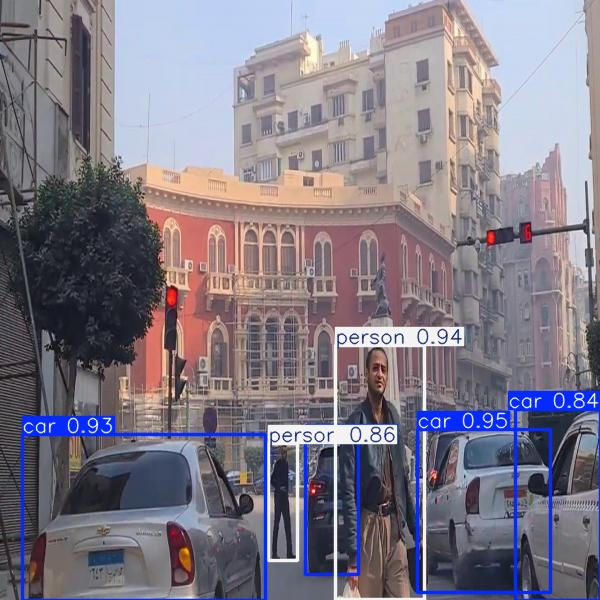

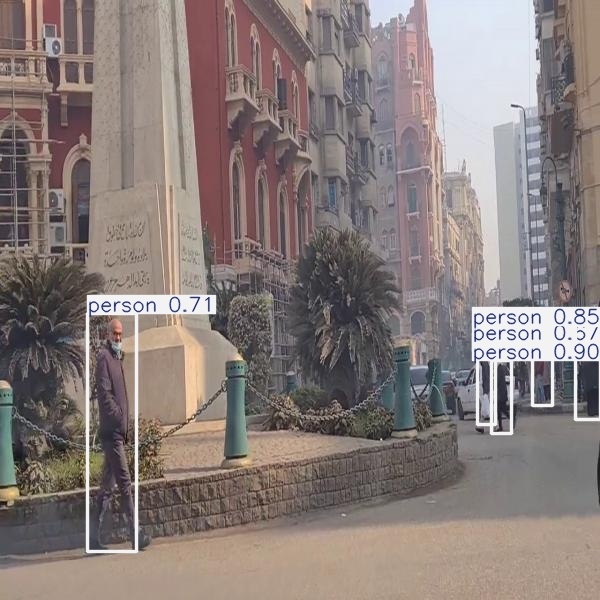

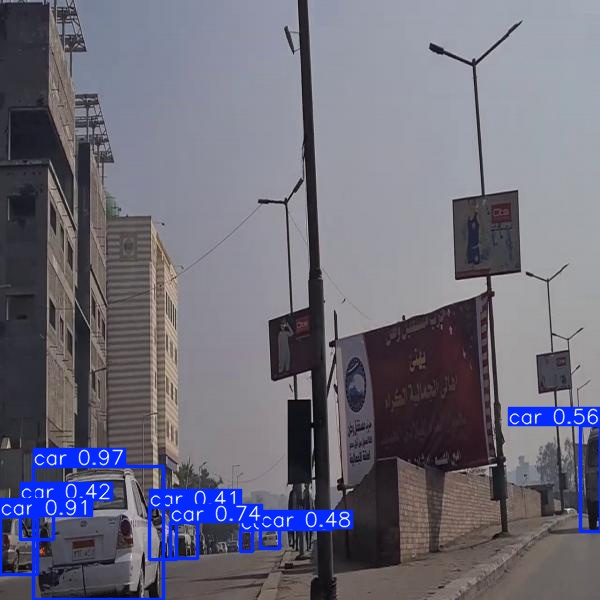

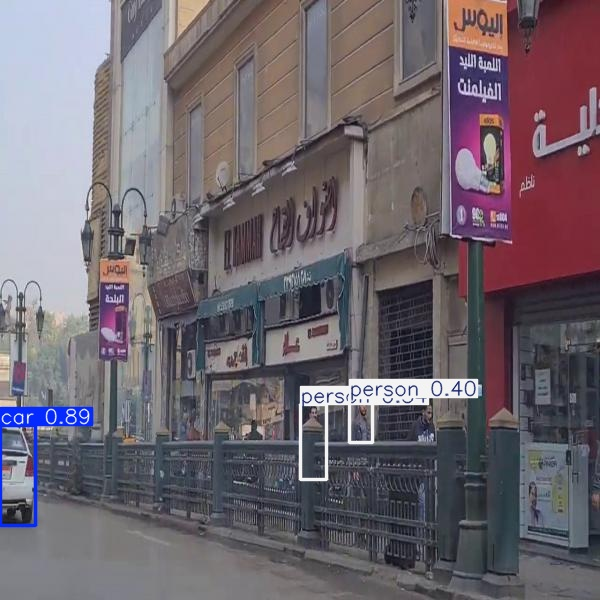

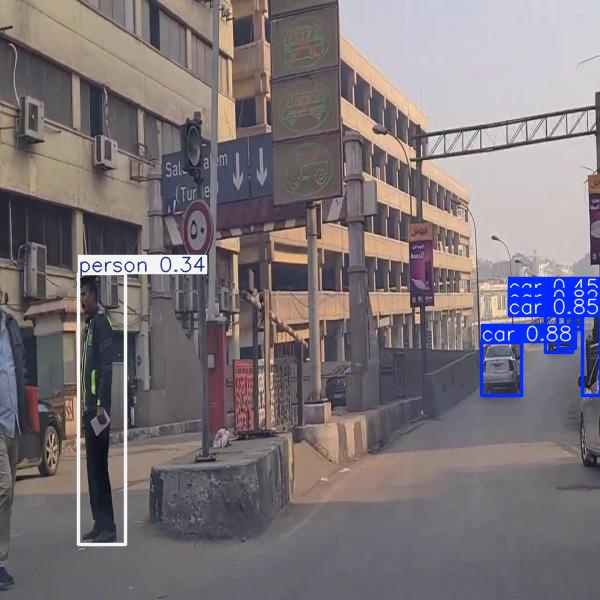

In [20]:
from IPython.display import Image, display
import glob

# Make sure we grab JPG files inside the correct folder
for image_path in glob.glob('/kaggle/working/runs/detect/train3/*.jpg')[:5]:
    display(Image(filename=image_path))

In [18]:
#!ls /kaggle/working/runs/detect/train3/
#just to confirm it exists 

cairo_frame10170_jpg.rf.9acc23ae8a27f98d08c404b30a174dc7.jpg
cairo_frame1020_jpg.rf.06121049de3b282e4a19359a8a3e0701.jpg
cairo_frame10710_jpg.rf.3e46ba77edc95eb031f99b6f4527c424.jpg
cairo_frame12720_jpg.rf.b01ed7056447797b0d8ba9a2b72c11bc.jpg
cairo_frame1380_jpg.rf.2096de041dbf6427ae79118e199d9ae2.jpg
cairo_frame14370_jpg.rf.63c280a69922a447c6f59639c021efdd.jpg
cairo_frame14400_jpg.rf.d8b5309c275db2a40e6b86723f7a2639.jpg
cairo_frame14460_jpg.rf.fbe83b9d3cb2b00a47adafa5e1bf66d2.jpg
cairo_frame14880_jpg.rf.8666fe3bdf393e5e15662f1f66016753.jpg
cairo_frame15810_jpg.rf.eb4af5b22dccd3d74c49c101c0fc1c35.jpg
cairo_frame16470_jpg.rf.05dff01c58c93442f432077cd8b6243f.jpg
cairo_frame16800_jpg.rf.8f058508d2059c8b8e9e2a25009e1f0b.jpg
cairo_frame17730_jpg.rf.40d55f2da6c6787b6d20c739439988a9.jpg
cairo_frame17790_jpg.rf.b05ec99d43de55ce61475abe19053a40.jpg
cairo_frame2100_jpg.rf.0dce9512ec7fae8e6df735c024577b17.jpg
cairo_frame2130_jpg.rf.52c3703e0b3f30e4a7fb5b46d57a92c7.jpg
cairo_frame3420_jpg.rf.667cc

In [ ]:
#INcase u want to train additional epochs
#model = YOLO('/kaggle/working/runs/detect/train/weights/best.pt')
#model.train(data='/kaggle/working/data.yaml', epochs=20)


In [21]:
#check where the model is saved : 
#!ls /kaggle/working/runs/detect/train*/weights/


best.pt  last.pt


In [22]:
model.export(format='onnx')  # Or 'torchscript', 'coreml', etc.

Ultralytics 8.3.141 🚀 Python-3.11.11 torch-2.6.0+cu124 CPU (Intel Xeon 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnxslim>=0.1.53', 'onnxruntime'] not found, attempting AutoUpdate...


Using Python 3.11.11 environment at: /usr
Resolved 22 packages in 348ms



requirements: AutoUpdate success ✅ 1.4s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect



 Downloaded onnxruntime
Prepared 4 packages in 406ms
Installed 4 packages in 18ms
 + coloredlogs==15.0.1
 + humanfriendly==10.0
 + onnxruntime==1.22.0
 + onnxslim==0.1.53



ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: slimming with onnxslim 0.1.53...
ONNX: export success ✅ 4.0s, saved as 'runs/detect/train/weights/best.onnx' (11.7 MB)

Export complete (4.4s)
Results saved to /kaggle/working/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.onnx imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.onnx imgsz=640 data=/kaggle/working/data.yaml  
Visualize:       https://netron.app


'runs/detect/train/weights/best.onnx'